In [1]:
import torch
import torch.nn as nn
from torchvision.models import vit_b_16 as ViT, ViT_B_16_Weights

# Load the Vision Transformer model
model = ViT(weights=ViT_B_16_Weights.DEFAULT)
model.heads = nn.Sequential(nn.Linear(in_features=768, out_features=100, bias=True))

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)




VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [4]:
# Load pretrained weights
checkpoint = torch.load("Ep.7.pth", map_location=device, weights_only=True)
model.load_state_dict(checkpoint)


print("Checkpoint Loaded Successfully!")

Checkpoint Loaded Successfully!


In [5]:
from torchvision import transforms

# Augmentation for training
train_transform = transforms.Compose([
    transforms.ToPILImage(mode='RGB'),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

# Validation transformation (No Augmentation)
val_transform = transforms.Compose([
    transforms.ToPILImage(mode='RGB'),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])


In [6]:
from dataset import SportDataset
from torch.utils.data import DataLoader

csv_file = "/home/jupyter-st124872/RTML/A3/dataset/sports.csv"
class_file = "/home/jupyter-st124872/RTML/A3/dataset/sports.csv"
root_dir = "/home/jupyter-st124872/RTML/A3/dataset/"

train_ds = SportDataset(csv_file=csv_file, class_file=class_file, root_dir=root_dir, train=True, transform=train_transform)
val_ds = SportDataset(csv_file=csv_file, class_file=class_file, root_dir=root_dir, train=False, transform=val_transform)
batch_size = 8
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False)


/home/jupyter-st124872/RTML/A3/dataset.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.class_dict = {row[2]:row[0] for i, row in classes.iterrows()}
/home/jupyter-st124872/RTML/A3/dataset.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.class_dict = {row[2]:row[0] for i, row in classes.iterrows()}


In [13]:
# ==========================
# 4️⃣ Train Model (Using train.py)
# ==========================
print("\n🚀 Starting Fine-Tuning (Logs will be saved in training_log.txt)...\n")
!python train.py  # Run training script

# Load and display training logs
with open("training_log.txt", "r") as f:
    print(f.read())



🚀 Starting Fine-Tuning (Logs will be saved in training_log.txt)...

Checkpoint Loaded Successfully!
/home/jupyter-st124872/RTML/A3/dataset.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.class_dict = {row[2]:row[0] for i, row in classes.iterrows()}
/home/jupyter-st124872/RTML/A3/dataset.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.class_dict = {row[2]:row[0] for i, row in classes.iterrows()}
EPOCH 8:
100%|██████████████████████████| 1687/1687 [04:34<00:00,  6.14it/s, loss=0.0848]
Epoch 8 loss: 0.5989796788286512
Updated Learning Rate: 0.000029
100%|██████████████████████████████| 63/63 [00:04<

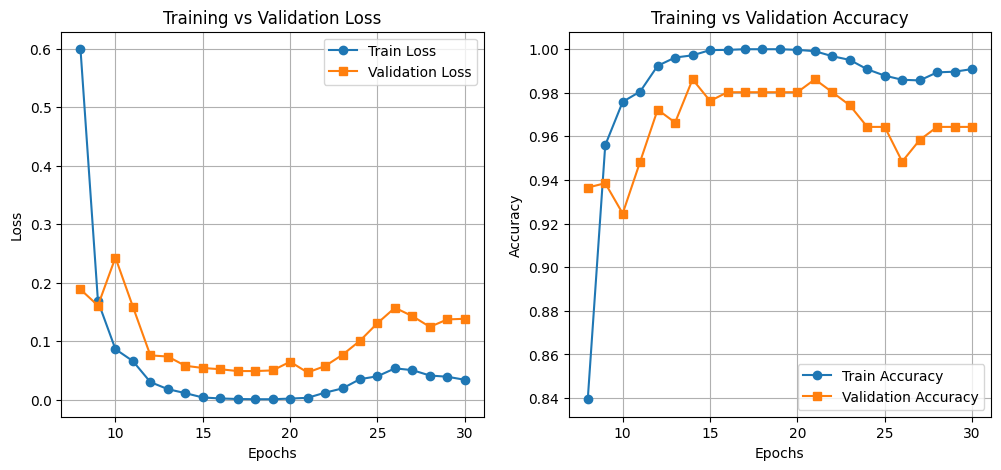

In [15]:
import matplotlib.pyplot as plt

# Extracted training and validation results from logs
epochs = list(range(8, 31))

train_losses = [0.5990, 0.1684, 0.0867, 0.0663, 0.0305, 0.0184, 0.0116, 0.0042, 0.0025, 0.0016, 
                0.0012, 0.0012, 0.0023, 0.0036, 0.0124, 0.0197, 0.0355, 0.0404, 0.0539, 0.0509, 
                0.0417, 0.0396, 0.0344]

val_losses = [0.1887, 0.1612, 0.2432, 0.1592, 0.0761, 0.0741, 0.0583, 0.0546, 0.0524, 0.0493, 
              0.0493, 0.0504, 0.0652, 0.0469, 0.0578, 0.0771, 0.1011, 0.1311, 0.1574, 0.1431, 
              0.1248, 0.1375, 0.1386]

train_accuracies = [0.8395, 0.9559, 0.9758, 0.9805, 0.9923, 0.9961, 0.9971, 0.9995, 0.9996, 0.9999, 
                    0.9999, 0.9999, 0.9996, 0.9990, 0.9967, 0.9950, 0.9907, 0.9878, 0.9859, 0.9856, 
                    0.9893, 0.9896, 0.9908]

val_accuracies = [0.9365, 0.9385, 0.9246, 0.9484, 0.9722, 0.9663, 0.9861, 0.9762, 0.9802, 0.9802, 
                  0.9802, 0.9802, 0.9802, 0.9861, 0.9802, 0.9742, 0.9643, 0.9643, 0.9484, 0.9583, 
                  0.9643, 0.9643, 0.9643]

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o', linestyle='-')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='s', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

# Save and display the graph
plt.savefig("training_plots.png")
plt.show()



In [22]:
# ==========================
# 4️⃣ Train Model (Using inference.py)
# ==========================
print("\n🚀 Running inference...\n")
!python inference.py --model saved/vit_b16/Ep.21.pth --images dataset/test/baseball/3.jpg dataset/test/archery/2.jpg dataset/test/cricket/5.jpg
  # Run training script

# Load and display training logs
with open("inference_results.txt", "r") as f:
    print(f.read())


🚀 Running inference...

Using device: cuda
/home/jupyter-st124872/RTML/A3/inference.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_